In [1]:
%cd ..

/home/feodor/Jupyter/topological-illustrations


/home/feodor/Jupyter/jupyter-env/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Load the data

In [3]:
input_path = 'geodata/gebco_2024_n4.0_s-11.0_w118.0_e137.0_ascii.asc'
output_path = "geodata/banda_sea_heights.csv"

# Load ASCII file (modify according to structure)
data = np.loadtxt(input_path, skiprows=6)  # Skip metadata lines

# Convert to DataFrame and save
df = pd.DataFrame(data)
df.to_csv(output_path, index=False)

print(f'df.shape = {df.shape}')

df.shape = (3600, 4560)


In [4]:
heights = df.values

print(f'heights.shape = {heights.shape}')
print(f'heights.min = {heights.min()}')
print(f'heights.max = {heights.max()}')
print(f'heights.mean = {heights.mean()}')

heights.shape = (3600, 4560)
heights.min = -7601.0
heights.max = 4239.0
heights.mean = -1773.7913320540936


# Filtration and Height Distribution

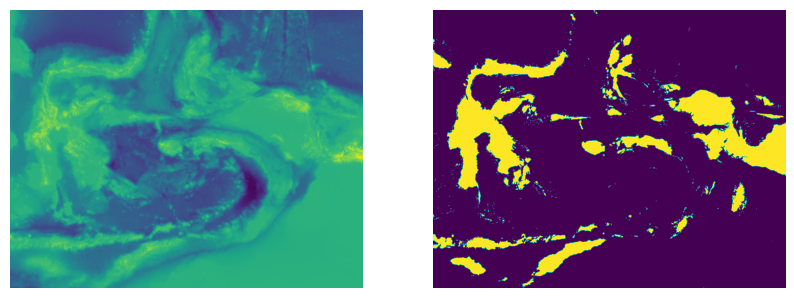

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(heights)
axs[1].imshow(heights >= 0)

axs[0].axis('off')
axs[1].axis('off')

plt.show()

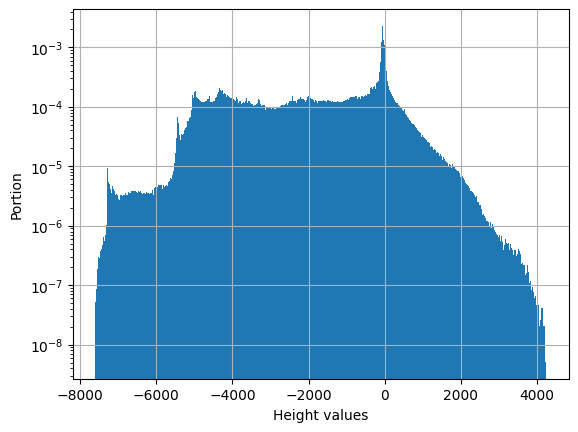

In [6]:
plt.hist(heights.reshape(-1), bins=np.linspace(heights.min(), heights.max(), 1000), density=True, log=True)

plt.xlabel('Height values')
plt.ylabel('Portion')
plt.grid(True)
plt.show()

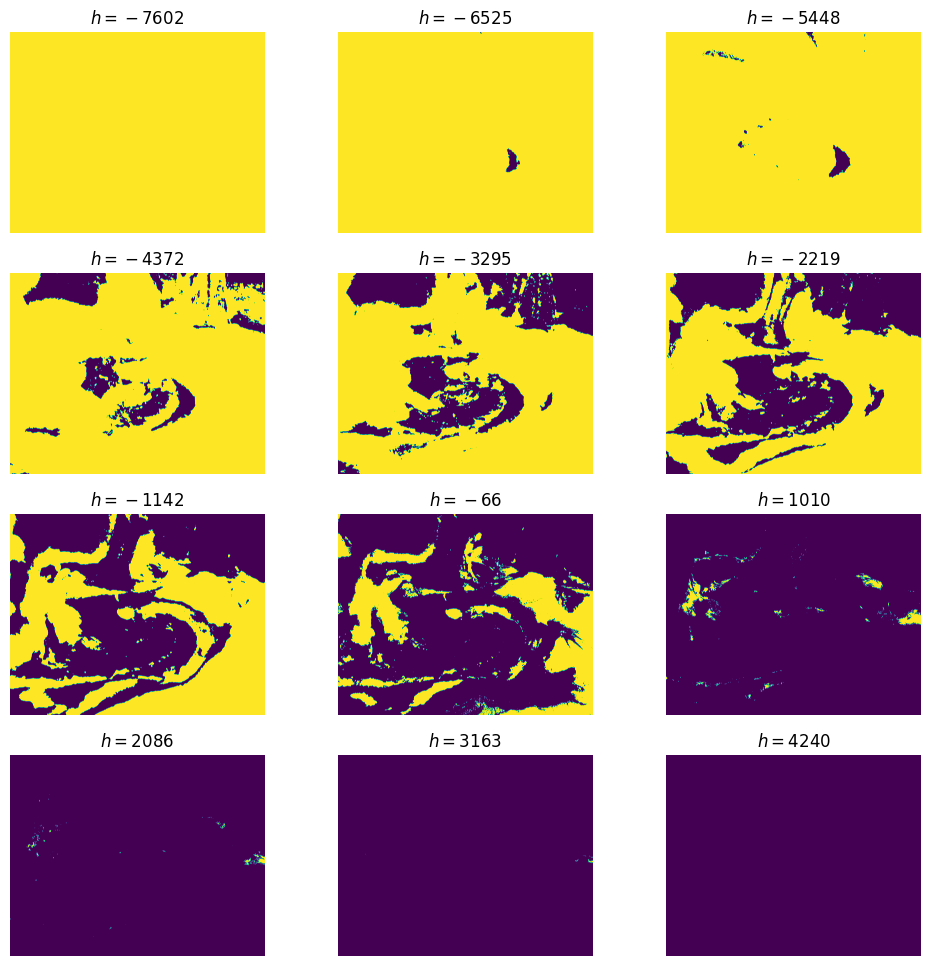

In [7]:
filtration_heights = np.linspace(heights.min() - 1, heights.max() + 1, 12).astype(int)

fig, axs = plt.subplots(4, 3, figsize=(12, 12))
for i, filtration_height in enumerate(filtration_heights):
    ai, aj = i//3, i%3
    axs[ai, aj].set_title(f'$h={filtration_height}$')
    axs[ai, aj].axis('off')
    axs[ai, aj].imshow(heights >= filtration_height, vmin=0, vmax=1)